# Már meglévő Model képzése #

In [1]:
from fastai.vision.all import *

In [39]:
foodPath = untar_data(URLs.FOOD)

#48 kategoria
categories = ['apple_pie', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'carrot_cake', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'club_sandwich', 'creme_brulee', 'cup_cakes', 'donuts', 'fish_and_chips', 'french_fries', 'french_onion_soup', 'french_toast', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'grilled_cheese_sandwich', 'grilled_salmon', 'hamburger', 'hot_dog', 'ice_cream', 'lasagna', 'macaroni_and_cheese', 'macarons', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pancakes', 'panna_cotta', 'pizza', 'risotto', 'spaghetti_bolognese', 'spaghetti_carbonara', 'steak', 'sushi', 'tacos', 'tiramisu', 'waffles']

def GetLabel(fileName):
  return fileName.split('-')[0]

#item_tfms=Resize(300)
dls_fine_tune = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.1, seed=42,
    label_func=GetLabel, item_tfms=Resize(100))

In [40]:
learn = load_learner('export.pkl')

In [41]:
learn.dls = dls_fine_tune

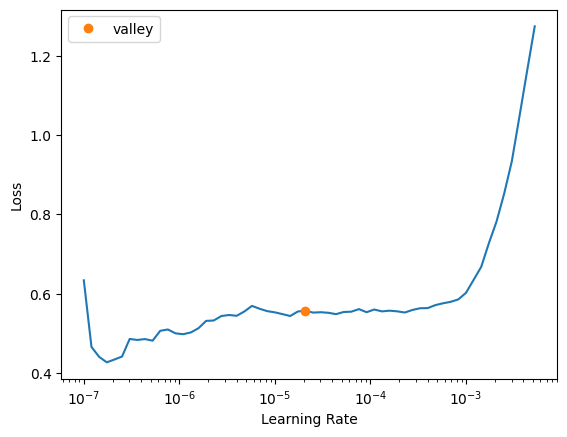

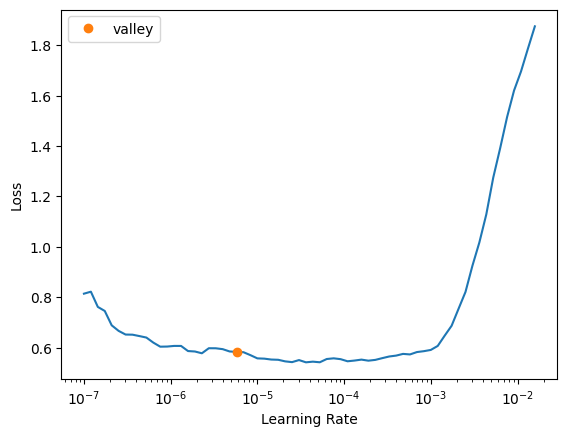

In [22]:
learn.lr_find()
suggested_lr = learn.lr_find().valley

In [43]:
#lr_max=slice(1e-7, 1e-6), base_lr=suggested_lr
learn.fine_tune(epochs=5)

epoch,train_loss,valid_loss,error_rate,time
0,1.321031,1.434408,0.388750,14:00


epoch,train_loss,valid_loss,error_rate,time
0,1.322745,1.410115,0.386042,18:30
1,1.197774,1.352705,0.366667,18:31
2,0.766090,1.352503,0.350417,18:38
3,0.362634,1.381094,0.332083,18:32
4,0.189382,1.399408,0.333750,18:29


In [38]:
learn.export()